In [174]:
from tabulate import tabulate
import pandas as pd
import matplotlib

df = pd.read_csv(r"C:\Users\Jamie\Documents\Projects\data_m2\Breakfast_Cereals.csv")

cereals = df



# **Cereals Data**

Fields in the dataset:

- Name: Name of cereal
- mfr: Manufacturer of cereal
* A = American Home Food Products;
* G = General Mills
* K = Kelloggs
* N = Nabisco
* P = Post
* Q = Quaker Oats
* R = Ralston Purina
- type:
* cold
* hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

In [175]:
cereals.columns = [col.capitalize() for col in cereals.columns]
cereals

,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


**Missing Data**

In [176]:
nan_rows = cereals[cereals.isna().any(axis=1)]
print(nan_rows)

                      Name Mfr Type  Calories  Protein  Fat  Sodium  Fiber  \
4           Almond_Delight   R    C       110        2    2     200    1.0   
20  Cream_of_Wheat_(Quick)   N    H       100        3    0      80    1.0   
57          Quaker_Oatmeal   Q    H       100        5    2       0    2.7   

    Carbo  Sugars  Potass  Vitamins  Shelf  Weight  Cups     Rating  
4    14.0     8.0     NaN        25      3     1.0  0.75  34.384843  
20   21.0     0.0     NaN         0      2     1.0  1.00  64.533816  
57    NaN     NaN   110.0         0      1     1.0  0.67  50.828392  


### Altered "NaN" data to show mean

In [177]:
cereals_original = cereals.copy()
mean_potass = cereals["Potass"].mean()
cereals["Potass"] = cereals["Potass"].fillna(mean_potass)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

In [178]:
cereals_original = cereals.copy()
mean_carbo = cereals["Carbo"].mean()
cereals["Carbo"] = cereals["Carbo"].fillna(mean_carbo)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

In [179]:
cereals_original = cereals.copy()
mean_sugars = cereals["Sugars"].mean()
cereals["Sugars"] = cereals["Sugars"].fillna(mean_sugars)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

### Alterations showing that the Data has been altered

In [180]:
selected_rows = cereals.iloc[[4, 20, 57]]
print(selected_rows)

                      Name Mfr Type  Calories  Protein  Fat  Sodium  Fiber  \
4           Almond_Delight   R    C       110        2    2     200    1.0   
20  Cream_of_Wheat_(Quick)   N    H       100        3    0      80    1.0   
57          Quaker_Oatmeal   Q    H       100        5    2       0    2.7   

        Carbo    Sugars      Potass  Vitamins  Shelf  Weight  Cups     Rating  
4   14.000000  8.000000   98.666667        25      3     1.0  0.75  34.384843  
20  21.000000  0.000000   98.666667         0      2     1.0  1.00  64.533816  
57  14.802632  7.026316  110.000000         0      1     1.0  0.67  50.828392  


In [181]:
cereals.Calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: Calories, dtype: float64

In [182]:
cereals.Mfr.describe()

count     77
unique     7
top        K
freq      23
Name: Mfr, dtype: object

In [183]:
calories = cereals.Calories - cereals.Calories.mean()
print(calories)

0    -36.883117
1     13.116883
2    -36.883117
3    -56.883117
4      3.116883
        ...    
72     3.116883
73     3.116883
74    -6.883117
75    -6.883117
76     3.116883
Name: Calories, Length: 77, dtype: float64


In [184]:
cereals['Name & Mfr'] = cereals['Name'] + ' (' + cereals['Mfr'] + ')'

# Drop the original 'Name' and 'Mfr' columns
cereals = cereals.drop(columns=['Name', 'Mfr'])

# Reorder columns to place 'Name & Mfr' at the beginning
columns = ['Name & Mfr'] + [col for col in cereals.columns if col != 'Name & Mfr']
cereals = cereals[columns]

cereals.head(10)

,Name & Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
0,100%_Bran (N),C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran (Q),C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.00,1.00,33.983679
2,All-Bran (K),C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber (K),C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.00,0.50,93.704912
4,Almond_Delight (R),C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios (G),C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.00,0.75,29.509541
6,Apple_Jacks (K),C,110,2,0,125,1.0,11.0,14.0,30.000000,25,2,1.00,1.00,33.174094
7,Basic_4 (G),C,130,3,2,210,2.0,18.0,8.0,100.000000,25,3,1.33,0.75,37.038562
8,Bran_Chex (R),C,90,2,1,200,4.0,15.0,6.0,125.000000,25,1,1.00,0.67,49.120253
9,Bran_Flakes (P),C,90,3,0,210,5.0,13.0,5.0,190.000000,25,3,1.00,0.67,53.313813


In [185]:
cereals.loc[0:9, ["Name & Mfr", "Calories"]]

,Name & Mfr,Calories
0,100%_Bran (N),70
1,100%_Natural_Bran (Q),120
2,All-Bran (K),70
3,All-Bran_with_Extra_Fiber (K),50
4,Almond_Delight (R),110
5,Apple_Cinnamon_Cheerios (G),110
6,Apple_Jacks (K),110
7,Basic_4 (G),130
8,Bran_Chex (R),90
9,Bran_Flakes (P),90


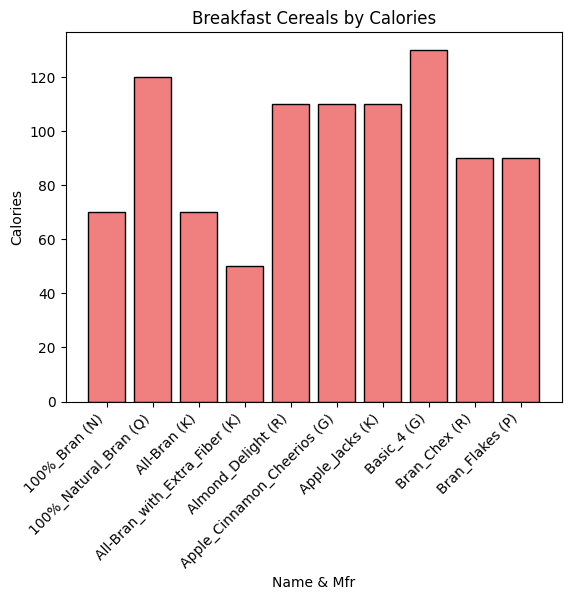

In [186]:
first_10_cereals = cereals[:10]  


plt.bar(first_10_cereals["Name & Mfr"], first_10_cereals["Calories"], color="lightcoral", edgecolor="black")

plt.xlabel("Name & Mfr")
plt.ylabel("Calories")
plt.title("Breakfast Cereals by Calories")

plt.xticks(rotation=45, ha='right')

plt.show()